<a href="https://colab.research.google.com/github/mattalejo/quant-stuff/blob/main/stockstuff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [3]:
!pip -q install yfinance

In [4]:
!pip -q install torch

In [5]:
import yfinance as yf
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import math as m
from sklearn.preprocessing import StandardScaler

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from torch.utils.data import Dataset, DataLoader
import math
import copy

In [7]:
if torch.cuda.is_available():
 dev = "cuda:0"
else:
 dev = "cpu"
device = torch.device(dev)

# Exploratory data analysis

In [8]:
asean_exchanges = ["PSEI.PS", "^KLSE", "^JKSE", "^SET.BK", "^STI"]

In [9]:
raw_data = yf.download(asean_exchanges, '2000-1-1','2022-12-31')
raw_data.fillna(method='ffill', inplace=True)
raw_data.tail()

[*********************100%%**********************]  5 of 5 completed


Adj Close                                                      \
                PSEI.PS        ^JKSE        ^KLSE      ^SET.BK         ^STI   
Date                                                                          
2022-12-26  6541.029785  6835.808105  1474.680054  1626.800049  3257.699951   
2022-12-27  6564.899902  6923.026855  1474.689941  1643.160034  3266.379883   
2022-12-28  6566.540039  6850.520020  1480.109985  1647.280029  3266.969971   
2022-12-29  6566.390137  6860.077148  1491.630005  1661.199951  3249.239990   
2022-12-30  6566.390137  6850.619141  1495.489990  1668.660034  3251.320068   

                  Close                                                      \
                PSEI.PS        ^JKSE        ^KLSE      ^SET.BK         ^STI   
Date                                                                          
2022-12-26  6541.029785  6835.808105  1474.680054  1626.800049  3257.699951   
2022-12-27  6564.899902  6923.026855  1474.689941  1643.160034  3266.379883   
2022-12-28  6566.540039  6850.520020  1480.109985  1647.280029  3266.969971   
2022-12-29  6566.390137  6860.077148  1491.630005  1661.199951  3249.239990   
2022-12-30  6566.390137  6850.619141  1495.489990  1668.660034  3251.320068   

            ...         Open                                         \
            ...      PSEI.PS        ^JKSE        ^KLSE      ^SET.BK   
Date        ...                                                       
2022-12-26  ...  6567.919922  6800.712891  1469.160034  1620.689941   
2022-12-27  ...  6549.089844  6835.847168  1474.390015  1632.060059   
2022-12-28  ...  6567.129883  6923.065918  1473.550049  1644.000000   
2022-12-29  ...  6553.669922  6850.520020  1476.270020  1644.729980   
2022-12-30  ...  6553.669922  6860.116211  1491.930054  1662.650024   

                           Volume                                       \
                   ^STI   PSEI.PS        ^JKSE        ^KLSE    ^SET.BK   
Date                                                                     
2022-12-26  3257.189941   56100.0  117543200.0   48286800.0  2656700.0   
2022-12-27  3277.580078   75400.0  121669200.0  114386800.0  4015200.0   
2022-12-28  3257.750000   88600.0  120571100.0  134741200.0  3836100.0   
2022-12-29  3255.100098  161100.0  141016100.0  107605300.0  3567500.0   
2022-12-30  3259.229980  161100.0  129302000.0  242921700.0  4527700.0   

                         
                   ^STI  
Date                     
2022-12-26   99027700.0  
2022-12-27  108508800.0  
2022-12-28  121539700.0  
2022-12-29  138022600.0  
2022-12-30  106326500.0  

[5 rows x 30 columns]

In [10]:
raw_data.shape

(5974, 30)

## Some visualization

In [11]:
returns = np.log(raw_data['Adj Close']/raw_data['Adj Close'].shift(1))
ar_returns = raw_data['Adj Close'].pct_change()
returns

,PSEI.PS,^JKSE,^KLSE,^SET.BK,^STI
Date,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN
2000-01-04,0.005313,NaN,-0.001308,NaN,-0.020650
2000-01-05,-0.037105,-0.032116,-0.020624,-0.067660,-0.056554
2000-01-06,0.002099,0.015270,0.003219,-0.049256,-0.013397
2000-01-07,0.007275,0.000000,0.000000,0.021969,0.019655
...,...,...,...,...,...
2022-12-26,0.000000,0.005153,0.000000,0.005702,0.000000
2022-12-27,0.003643,0.012678,0.000007,0.010006,0.002661
2022-12-28,0.000250,-0.010529,0.003669,0.002504,0.000181


<Axes: xlabel='Date'>

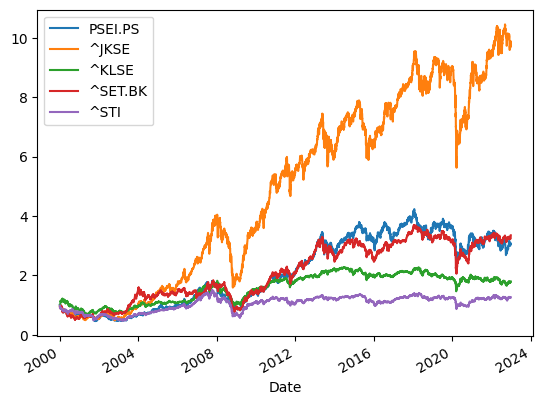

In [12]:
norm_price = np.exp(np.cumsum(returns))
norm_price.plot()

<Axes: xlabel='Date'>

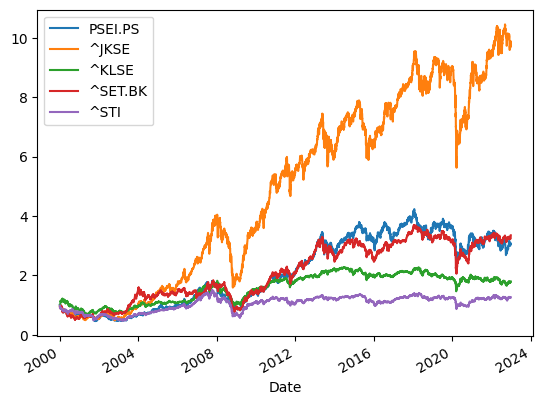

In [13]:
np.cumprod(1+ar_returns).plot()

In [76]:
returns_psei = pd.DataFrame(returns['PSEI.PS'].iloc[1::]).dropna()
norm_returns_psei_fit = StandardScaler().fit(returns_psei)
norm_returns_psei = pd.DataFrame(norm_returns_psei_fit.transform(returns_psei), columns = ['PSEI.PS'])

<Axes: xlabel='Date'>

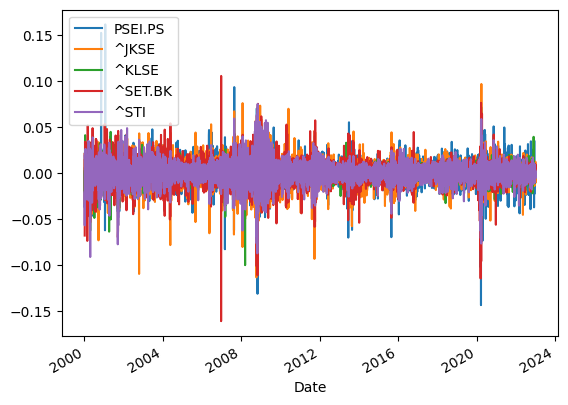

In [15]:
returns.plot()

In [16]:
cumulative_returns= (raw_data['Adj Close'].pct_change()+1).cumprod()

<Axes: xlabel='Date'>

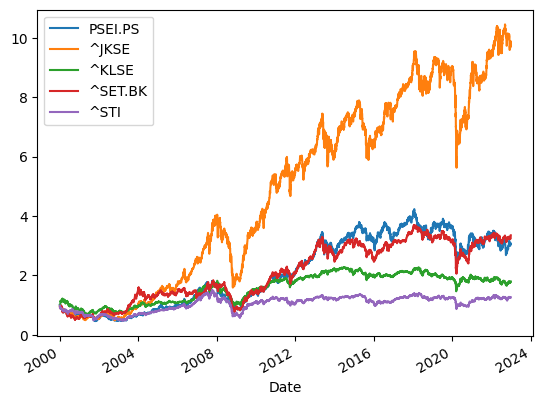

In [17]:
cumulative_returns.plot()

# Performing some random statistical and normality tests

In [18]:
import scipy.stats as sp

In [19]:
returns_list = returns['^KLSE'].values.tolist()
returns_list.pop(0)

nan

In [20]:
shapiro_test= sp.shapiro(returns_list)
print(shapiro_test)

ShapiroResult(statistic=0.9117860794067383, pvalue=0.0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [21]:
sp.normaltest(returns_list)

NormaltestResult(statistic=1491.2017158964713, pvalue=0.0)

In [22]:
sp.anderson(returns_list)

AndersonResult(statistic=97.54941533959209, critical_values=array([0.576, 0.656, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=9.779133903379644e-05, scale=0.007915394612454782)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

# Data preprocessing

## Building preprocessing classes

In [109]:
class PreProcess():
  def __init__(self, ts_df, window_size, train_ratio):
    self.ts_df = ts_df
    self.window_size = window_size
    self.train_ratio = train_ratio

  def fit(self):
    return StandardScaler().fit(self.ts_df)

  def scale(self):
    return self.fit(self.ts_df).transform(self.ts_df)

  def pe(self):
    date = pd.DataFrame(index = self.ts_df.index)
    y = pd.DatetimeIndex(self.ts_df.index).year.astype(np.float32)
    m = pd.DatetimeIndex(self.ts_df.index).month.astype(np.float32)
    d = pd.DatetimeIndex(self.ts_df.index).day.astype(np.float32)
    date['sin_m'] = np.sin(2*math.pi*m/12)
    date['cos_m'] = np.cos(2*math.pi*m/12)
    date['sin_d'] = np.sin(2*math.pi*d/30)
    date['cos_d'] = np.cos(2*math.pi*d/30)
    return date

  def train_size(self):
    train_size = int(math.ceil(len(self.ts_df)*self.train_ratio))
    return train_size

  def test_size(self):
    test_size = int(len(self.ts_df) - self.train_size)
    return test_size

  def train(self):
    train = self.ts_df.iloc[:self.train_size:]
    return train

  def test(self):
    test = self.ts_df.iloc[self.train_size +1:-1:]
    return test

  def time_features(self):
    original_ts_df = self.ts_df
    time_features = pd.DataFrame(columns = [f"x{i+1}" for i in range(self.window_size)], index = self.ts_df.index)
    for i in range(self.window_size):
      time_features[f"x{i+1}"] = original_ts_df.shift(-(i+1))
    return time_features

  def concatenate(self):
    concatenate = pd.concat([self.time_features(), self.pe()], axis = 1)
    return concatenate

  def smoothing(self):
    return None

In [110]:
data = PreProcess(returns_psei,,0.8)

In [112]:
data.concatenate().dropna(how='any')

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x59,x60,x61,x62,x63,x64,sin_m,cos_m,sin_d,cos_d
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,-0.037105,0.002099,0.007275,0.022642,-0.000686,-0.018747,-0.007894,0.008408,-0.002319,-0.010733,...,0.009198,0.002254,-0.005860,0.003936,-0.009522,0.003917,0.500000,8.660254e-01,7.431448e-01,0.669131
2000-01-05,0.002099,0.007275,0.022642,-0.000686,-0.018747,-0.007894,0.008408,-0.002319,-0.010733,-0.012762,...,0.002254,-0.005860,0.003936,-0.009522,0.003917,-0.003435,0.500000,8.660254e-01,8.660254e-01,0.500000
2000-01-06,0.007275,0.022642,-0.000686,-0.018747,-0.007894,0.008408,-0.002319,-0.010733,-0.012762,0.002360,...,-0.005860,0.003936,-0.009522,0.003917,-0.003435,0.005051,0.500000,8.660254e-01,9.510565e-01,0.309017
2000-01-07,0.022642,-0.000686,-0.018747,-0.007894,0.008408,-0.002319,-0.010733,-0.012762,0.002360,0.004514,...,0.003936,-0.009522,0.003917,-0.003435,0.005051,0.013037,0.500000,8.660254e-01,9.945219e-01,0.104528
2000-01-10,-0.000686,-0.018747,-0.007894,0.008408,-0.002319,-0.010733,-0.012762,0.002360,0.004514,-0.003448,...,-0.009522,0.003917,-0.003435,0.005051,0.013037,0.014631,0.500000,8.660254e-01,8.660254e-01,-0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-27,-0.023596,0.009238,-0.033095,0.007303,0.034762,0.000145,-0.009112,-0.000351,-0.016934,0.002533,...,-0.012738,0.006813,0.009659,0.008573,-0.005475,0.000000,-1.000000,-1.836970e-16,-5.877853e-01,0.809017
2022-09-28,0.009238,-0.033095,0.007303,0.034762,0.000145,-0.009112,-0.000351,-0.016934,0.002533,0.001070,...,0.006813,0.009659,0.008573,-0.005475,0.000000,0.003643,-1.000000,-1.836970e-16,-4.067366e-01,0.913545
2022-09-29,-0.033095,0.007303,0.034762,0.000145,-0.009112,-0.000351,-0.016934,0.002533,0.001070,0.007151,...,0.009659,0.008573,-0.005475,0.000000,0.003643,0.000250,-1.000000,-1.836970e-16,-2.079117e-01,0.978148


In [ ]:
print(m.pi)

3.141592653589793


## Preprocessing PSEi returns

In [ ]:
for i in range(64):
  norm_returns_psei[f"x{i+1}"] = norm_returns_psei['PSEI.PS'].shift(i+1)

In [ ]:
norm_returns_psei= norm_returns_psei.dropna(axis=0,how='any')
norm_returns_psei

,PSEI.PS,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.400526,-2.914157,0.149390,0.553799,1.754645,-0.068295,-1.479623,-0.631516,0.642358,-0.195911,...,-0.282495,-0.227408,1.566799,0.037861,0.704114,0.161475,-0.472611,0.292931,-0.758746,0.291413
1,-2.914157,0.149390,0.553799,1.754645,-0.068295,-1.479623,-0.631516,0.642358,-0.195911,-0.853396,...,-0.227408,1.566799,0.037861,0.704114,0.161475,-0.472611,0.292931,-0.758746,0.291413,-0.283098
2,0.149390,0.553799,1.754645,-0.068295,-1.479623,-0.631516,0.642358,-0.195911,-0.853396,-1.011883,...,1.566799,0.037861,0.704114,0.161475,-0.472611,0.292931,-0.758746,0.291413,-0.283098,0.380041
3,0.553799,1.754645,-0.068295,-1.479623,-0.631516,0.642358,-0.195911,-0.853396,-1.011883,0.169751,...,0.037861,0.704114,0.161475,-0.472611,0.292931,-0.758746,0.291413,-0.283098,0.380041,1.004055
4,1.754645,-0.068295,-1.479623,-0.631516,0.642358,-0.195911,-0.853396,-1.011883,0.169751,0.338071,...,0.704114,0.161475,-0.472611,0.292931,-0.758746,0.291413,-0.283098,0.380041,1.004055,1.128614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5904,-3.062835,-1.858552,0.707243,-2.600796,0.556009,2.701752,-0.003312,-0.726691,-0.042056,-1.337926,...,-0.048134,0.372457,-0.586956,-0.855713,-1.010070,0.517731,0.740101,0.655221,-0.442489,-0.014660
5905,-1.858552,0.707243,-2.600796,0.556009,2.701752,-0.003312,-0.726691,-0.042056,-1.337926,0.183240,...,0.372457,-0.586956,-0.855713,-1.010070,0.517731,0.740101,0.655221,-0.442489,-0.014660,0.269986
5906,0.707243,-2.600796,0.556009,2.701752,-0.003312,-0.726691,-0.042056,-1.337926,0.183240,0.068949,...,-0.586956,-0.855713,-1.010070,0.517731,0.740101,0.655221,-0.442489,-0.014660,0.269986,0.004860
5907,-2.600796,0.556009,2.701752,-0.003312,-0.726691,-0.042056,-1.337926,0.183240,0.068949,0.544150,...,-0.855713,-1.010070,0.517731,0.740101,0.655221,-0.442489,-0.014660,0.269986,0.004860,-0.016444


## Preprocessing Adj close

In [ ]:
close_psei = pd.DataFrame(raw_data["Adj Close"]["PSEI.PS"])
close_psei

close_psei_fit = StandardScaler().fit(close_psei)
norm_close_psei = pd.DataFrame(close_psei_fit.transform(close_psei),columns=['PSEI.PS'],index=close_psei.index)
norm_close_psei

,PSEI.PS
Date,
2000-01-03,-0.946501
2000-01-04,-0.941960
2000-01-05,-0.973175
2000-01-06,-0.971439
2000-01-07,-0.965398
...,...
2022-12-26,0.805028
2022-12-27,0.814530
2022-12-28,0.815183


In [ ]:
for i in range(64):
  norm_close_psei[f"x{i+1}"] = norm_close_psei["PSEI.PS"].shift(-(i+1))

norm_close_psei.dropna(axis=0,how='any')
norm_close_psei = norm_close_psei.iloc[:len(close_psei.index)-64:]

norm_close_psei

,PSEI.PS,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,-0.946501,-0.941960,-0.973175,-0.971439,-0.965398,-0.946310,-0.946895,-0.962719,-0.969294,-0.962289,...,-1.139407,-1.141663,-1.143450,-1.130050,-1.129600,-1.123416,-1.121891,-1.125847,-1.123193,-1.129596
2000-01-04,-0.941960,-0.973175,-0.971439,-0.965398,-0.946310,-0.946895,-0.962719,-0.969294,-0.962289,-0.964228,...,-1.141663,-1.143450,-1.130050,-1.129600,-1.123416,-1.121891,-1.125847,-1.123193,-1.129596,-1.126970
2000-01-05,-0.973175,-0.971439,-0.965398,-0.946310,-0.946895,-0.962719,-0.969294,-0.962289,-0.964228,-0.973139,...,-1.143450,-1.130050,-1.129600,-1.123416,-1.121891,-1.125847,-1.123193,-1.129596,-1.126970,-1.129274
2000-01-06,-0.971439,-0.965398,-0.946310,-0.946895,-0.962719,-0.969294,-0.962289,-0.964228,-0.973139,-0.983610,...,-1.130050,-1.129600,-1.123416,-1.121891,-1.125847,-1.123193,-1.129596,-1.126970,-1.129274,-1.125883
2000-01-07,-0.965398,-0.946310,-0.946895,-0.962719,-0.969294,-0.962289,-0.964228,-0.973139,-0.983610,-0.981683,...,-1.129600,-1.123416,-1.121891,-1.125847,-1.123193,-1.129596,-1.126970,-1.129274,-1.125883,-1.117052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-27,0.597638,0.541750,0.563474,0.486570,0.503322,0.584760,0.585106,0.563482,0.562654,0.523000,...,0.821489,0.834503,0.815287,0.787301,0.754566,0.772022,0.796974,0.819323,0.805028,0.805028
2022-09-28,0.541750,0.563474,0.486570,0.503322,0.584760,0.585106,0.563482,0.562654,0.523000,0.528887,...,0.834503,0.815287,0.787301,0.754566,0.772022,0.796974,0.819323,0.805028,0.805028,0.814530
2022-09-29,0.563474,0.486570,0.503322,0.584760,0.585106,0.563482,0.562654,0.523000,0.528887,0.531379,...,0.815287,0.787301,0.754566,0.772022,0.796974,0.819323,0.805028,0.805028,0.814530,0.815183


## Setting up the datasets for training

In [ ]:
training_ratio = 0.8
training_size = math.ceil(training_ratio*len(returns_psei.index))

In [ ]:
returns_train = norm_returns_psei.iloc[:training_size:]
returns_test = norm_returns_psei.iloc[training_size+1:-1:]

X_train = returns_train.drop("PSEI.PS", axis = 1)
y_train = returns_train["PSEI.PS"]

y_train_1 = returns_train["PSEI.PS"]

X_test = returns_test.drop("PSEI.PS", axis = 1)
y_test = returns_test["PSEI.PS"]

X_train = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1,1).to(device)
X_test = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1,1).to(device)

In [ ]:
training_close = math.ceil(training_ratio*len(close_psei.index))

close_train = norm_close_psei.iloc[:training_close:]
close_test = norm_close_psei.iloc[training_close+1:-1:]

X_close_train = close_train.drop("PSEI.PS", axis = 1)
y_close_train = close_train["PSEI.PS"]

y_close_train_1 = close_train["PSEI.PS"]

X_close_test = close_test.drop("PSEI.PS", axis = 1)
y_close_test = close_test["PSEI.PS"]

X_close_train = torch.tensor(X_close_train.values, dtype=torch.float32).to(device)
y_close_train = torch.tensor(y_close_train.values, dtype=torch.float32).reshape(-1,1).to(device)
X_close_test = torch.tensor(X_close_test.values, dtype=torch.float32).to(device)
y_close_test = torch.tensor(y_close_test.values, dtype=torch.float32).reshape(-1,1).to(device)

# ANNs

## Prepping the data

## Building the model

In [ ]:
class NeuralNet(nn.Module):
  def __init__(self):
    super(NeuralNet, self).__init__()
    self.flatten = nn.Flatten()
    self.stack = nn.Sequential(
        nn.Linear(64 ,16),
        nn.Sigmoid(),
        nn.Linear(16,16),
        nn.Sigmoid(),
        nn.Linear(16,16),
        nn.Sigmoid(),
        nn.Linear(16,16),
        nn.Sigmoid(),
        nn.Linear(16,1),
        nn.Sigmoid()
    )

  def forward(self,x):
    x = self.flatten(x)
    logits = self.stack(x)
    return logits

model_ann = NeuralNet().to(device)
print(model_ann)

NeuralNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (stack): Sequential(
    (0): Linear(in_features=64, out_features=16, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=16, out_features=16, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=16, out_features=16, bias=True)
    (7): Sigmoid()
    (8): Linear(in_features=16, out_features=1, bias=True)
    (9): Sigmoid()
  )
)


In [ ]:
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model_ann.parameters(), lr = 0.00001)

### Check number of parameters

In [ ]:
total_params_ann = sum(p.numel() for p in model_ann.parameters())
total_params_ann

1873

## Close

In [ ]:
epochs = 1000
batch = 16

for epoch in range(epochs):
  for i in range(0,len(X_train), batch):
    Xbatch = X_train[i:i+batch]
    y_pred = model_ann(Xbatch)
    y_batch = y_train[i:i+batch]
    loss = loss_fn(y_pred,y_batch)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  if (epoch + 1) % 10 == 0:
        model_ann.eval()
        with torch.no_grad():
            val_pred = model_ann(X_test)
            val_loss = loss_fn(val_pred, y_test)
            print(f"Epoch [{epoch+1}/{epochs}] - Train Loss: {loss.item():.4f} - Validation Loss: {val_loss.item():.4f}")

Epoch [10/1000] - Train Loss: 0.2188 - Validation Loss: 1.3079
Epoch [20/1000] - Train Loss: 0.2244 - Validation Loss: 1.2574
Epoch [30/1000] - Train Loss: 0.2364 - Validation Loss: 1.2223
Epoch [40/1000] - Train Loss: 0.2507 - Validation Loss: 1.1989


KeyboardInterrupt: ignored

In [ ]:
h = pd.DataFrame(model_ann(X_train).cpu().detach().numpy(), index = returns_train["PSEI.PS"].index)
norm_returns_comparison_train = pd.DataFrame(returns_train["PSEI.PS"])
norm_returns_comparison_train["Pred"] = h

returns_comparison_train = pd.DataFrame(norm_returns_psei_fit.inverse_transform(norm_returns_comparison_train),columns=['PSEI.PS', 'Prediction'])

np.exp(returns_comparison_train['PSEI.PS'].cumsum()).plot()

In [ ]:
y_pred_test = model_ann(X_test)

print(loss_fn(y_pred_test,y_test))

In [ ]:
h_test = pd.DataFrame(y_pred_test.detach().cpu().numpy(), index = returns_test["PSEI.PS"].index)
norm_returns_comparison_test = pd.DataFrame(returns_test["PSEI.PS"])
norm_returns_comparison_test["Pred"] = h_test

returns_comparison_test = no

np.exp(returns_comparison_test.cumsum()).plot()

## Close prices

In [ ]:
for epoch in range(epochs):
  for i in range(0,len(X_train), batch):
    X_closebatch = X_close_train[i:i+batch]
    y_close_pred = model_ann(X_closebatch)
    y_close_batch = y_close_train[i:i+batch]
    loss_close = loss_fn(y_close_pred,y_close_batch)
    optimizer.zero_grad()
    loss_close.backward()
    optimizer.step()

  if (epoch + 1) % 10 == 0:
        model_ann.eval()
        with torch.no_grad():
            val_pred_close = model_ann(X_close_test)
            val_loss_close = loss_fn(val_pred_close, y_close_test)
            print(f"Epoch [{epoch+1}/{epochs}] - Train Loss: {loss_close.item():.4f} - Validation Loss: {val_loss_close.item():.4f}")

In [ ]:
h_close = pd.DataFrame(model_ann(X_close_train).cpu().detach().numpy(), index = close_train["PSEI.PS"].index)
norm_close_comparison_train = pd.DataFrame(close_train["PSEI.PS"])
norm_close_comparison_train["Pred"] = h_close

close_comparison_train = pd.DataFrame(close_psei_fit.inverse_transform(norm_close_comparison_train),columns=['PSEI.PS', 'Prediction'])

close_comparison_train[:100:].plot()

# Transformer (Encoder only) model

## Importing NN libraries

In [ ]:
"""
d_model (int): number of independent variables, in time series, lag

"""

class TransformerModel(nn.Module):
    def __init__(self, input_dim, output_dim, d_model, nhead, num_encoder_layers, dropout):
        super(TransformerModel, self).__init__()
        self.encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dropout=dropout),
            num_layers=num_encoder_layers
        )
        self.fc = nn.Linear(d_model, output_dim)

    def forward(self, x):
        x = self.encoder(x)
        x = self.fc(x)
        return x

In [ ]:
input_dim = 64
output_dim = 1
d_model = 64
nhead = 4
num_encoder_layers = 2
lr = 0.0001
num_epochs = 1000
dropout = 0.2


model = TransformerModel(input_dim, output_dim, d_model, nhead, num_encoder_layers, dropout).to(device)
model_close = TransformerModel(input_dim, output_dim, d_model, nhead, num_encoder_layers, dropout).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

In [ ]:
total_params = sum(p.numel() for p in model.parameters())
total_params

562369

In [ ]:
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        model.eval()
        with torch.no_grad():
            val_pred = model(X_test)
            val_loss = criterion(val_pred, y_test)
            print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {loss.item():.4f} - Validation Loss: {val_loss.item():.4f}")

print("Training finished!")

Epoch [10/1000] - Train Loss: 0.7566 - Validation Loss: 1.2746
Epoch [20/1000] - Train Loss: 0.7078 - Validation Loss: 1.3267
Epoch [30/1000] - Train Loss: 0.6483 - Validation Loss: 1.3295
Epoch [40/1000] - Train Loss: 0.6127 - Validation Loss: 1.3382
Epoch [50/1000] - Train Loss: 0.5818 - Validation Loss: 1.3468
Epoch [60/1000] - Train Loss: 0.5334 - Validation Loss: 1.3532
Epoch [70/1000] - Train Loss: 0.5120 - Validation Loss: 1.3646
Epoch [80/1000] - Train Loss: 0.4823 - Validation Loss: 1.3817
Epoch [90/1000] - Train Loss: 0.4571 - Validation Loss: 1.3893
Epoch [100/1000] - Train Loss: 0.4367 - Validation Loss: 1.4063
Epoch [110/1000] - Train Loss: 0.4163 - Validation Loss: 1.4128
Epoch [120/1000] - Train Loss: 0.3947 - Validation Loss: 1.4245
Epoch [130/1000] - Train Loss: 0.3656 - Validation Loss: 1.4360
Epoch [140/1000] - Train Loss: 0.3501 - Validation Loss: 1.4500
Epoch [150/1000] - Train Loss: 0.3360 - Validation Loss: 1.4602
Epoch [160/1000] - Train Loss: 0.3159 - Validatio

In [ ]:
for epoch in range(num_epochs):
    model_close.train()
    optimizer.zero_grad()
    y_close_pred = model_close(X_close_train)
    loss = criterion(y_close_pred, y_close_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        model_close.eval()
        with torch.no_grad():
            val_close_pred = model_close(X_close_test)
            val_close_loss = criterion(val_close_pred, y_close_test)
            print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {loss.item():.4f} - Validation Loss: {val_close_loss.item():.4f}")

print("Training finished!")

Epoch [10/1000] - Train Loss: 0.8043 - Validation Loss: 0.4887
Epoch [20/1000] - Train Loss: 0.8166 - Validation Loss: 0.4887
Epoch [30/1000] - Train Loss: 0.8055 - Validation Loss: 0.4887
Epoch [40/1000] - Train Loss: 0.8209 - Validation Loss: 0.4887
Epoch [50/1000] - Train Loss: 0.8205 - Validation Loss: 0.4887
Epoch [60/1000] - Train Loss: 0.8087 - Validation Loss: 0.4887
Epoch [70/1000] - Train Loss: 0.8163 - Validation Loss: 0.4887
Epoch [80/1000] - Train Loss: 0.8089 - Validation Loss: 0.4887
Epoch [90/1000] - Train Loss: 0.8054 - Validation Loss: 0.4887
Epoch [100/1000] - Train Loss: 0.8082 - Validation Loss: 0.4887
Epoch [110/1000] - Train Loss: 0.7887 - Validation Loss: 0.4887
Epoch [120/1000] - Train Loss: 0.8080 - Validation Loss: 0.4887
Epoch [130/1000] - Train Loss: 0.8144 - Validation Loss: 0.4887
Epoch [140/1000] - Train Loss: 0.8044 - Validation Loss: 0.4887
Epoch [150/1000] - Train Loss: 0.8063 - Validation Loss: 0.4887
Epoch [160/1000] - Train Loss: 0.8276 - Validatio

<Axes: >

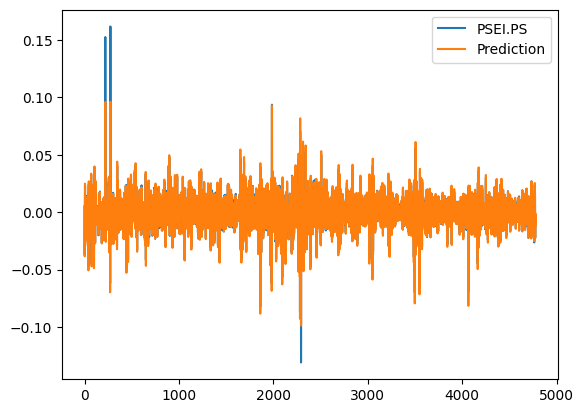

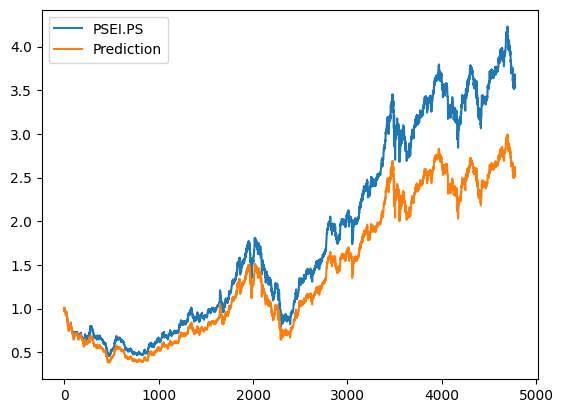

In [ ]:
h_t = pd.DataFrame(model(X_train).cpu().detach().numpy(), index = returns_train["PSEI.PS"].index)
norm_returns_comparison_train_t = pd.DataFrame(returns_train["PSEI.PS"])
norm_returns_comparison_train_t["Pred"] = pd.DataFrame(h_t)

returns_comparison_train_t = pd.DataFrame(norm_returns_psei_fit.inverse_transform(norm_returns_comparison_train_t), columns = ['PSEI.PS', 'Prediction'], index = returns_train.index)

returns_comparison_train_t.plot()
np.exp(returns_comparison_train_t.cumsum()).plot()

<Axes: >

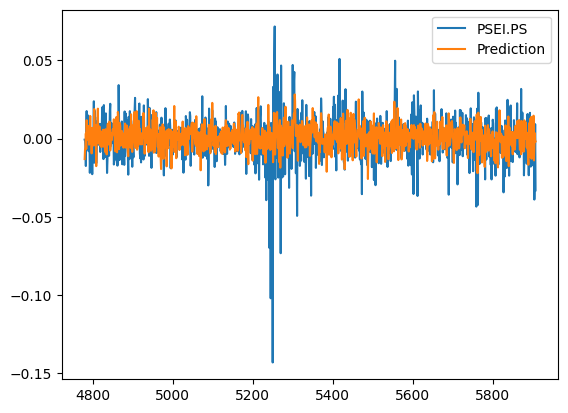

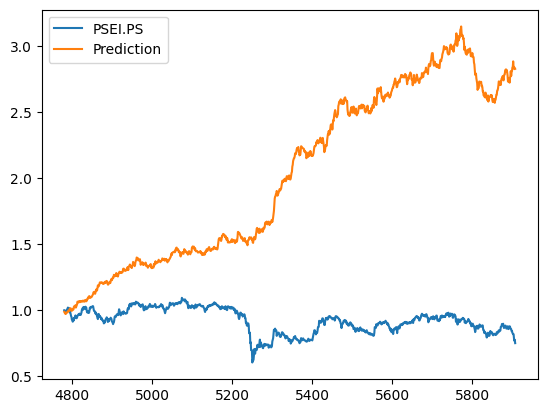

In [ ]:
h_t_test = pd.DataFrame(model(X_test).cpu().detach().numpy(), index = returns_test["PSEI.PS"].index)
norm_returns_comparison_test_transformer = pd.DataFrame(returns_test["PSEI.PS"])
norm_returns_comparison_test_transformer["Pred"] = pd.DataFrame(h_t_test)

returns_comparison_test_transformer = pd.DataFrame(norm_returns_psei_fit.inverse_transform(norm_returns_comparison_test_transformer), index = returns_test["PSEI.PS"].index, columns = ['PSEI.PS', 'Prediction'])

returns_comparison_test_transformer.plot()
np.exp(returns_comparison_test_transformer.cumsum()).plot()

<Axes: >

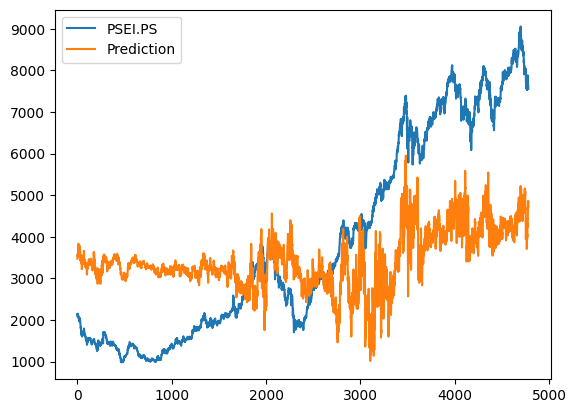

In [ ]:
h_close_t = pd.DataFrame(model_close(X_close_train).cpu().detach().numpy(), index = close_train["PSEI.PS"].index)
norm_close_comparison_train_t = pd.DataFrame(close_train["PSEI.PS"])
norm_close_comparison_train_t["Pred"] = pd.DataFrame(h_close_t)

close_comparison_train_t = pd.DataFrame(close_psei_fit.inverse_transform(norm_close_comparison_train_t), columns = ['PSEI.PS', 'Prediction'])
close_comparison_train_t.plot()

<Axes: xlabel='Date'>

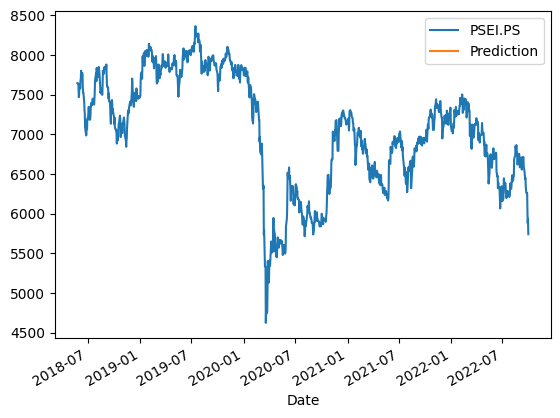

In [ ]:
h_close_t_test = pd.DataFrame(model_close(X_close_test).cpu().detach().numpy(), index = returns_test["PSEI.PS"].index)
close_comparison_test_transformer = pd.DataFrame(close_test["PSEI.PS"])
close_comparison_test_transformer["Prediction"] = pd.DataFrame(h_close_t_test)

close_comparison_test_transformer = pd.DataFrame(close_psei_fit.inverse_transform(close_comparison_test_transformer), index = close_test["PSEI.PS"].index, columns = ['PSEI.PS', 'Prediction'])

close_comparison_test_transformer.plot()

# Transformer (Encoder + Decoder) model

In [ ]:
# Initialize model and hyperparameters
num_epochs = 1000
input_size = 64
hidden_size = 8
num_layers = 2
num_heads = 4
dropout = 0.1
learning_rate = 0.001

transformer_model = nn.Transformer(nhead=num_heads, num_encoder_layers=num_layers, num_decoder_layers=num_layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(transformer_model.parameters(), lr=learning_rate)
input_size

64

In [ ]:
sequence_length = 32

for epoch in range(num_epochs):
    model_t.train()
    total_loss = 0
    for i in range(0, len(y_train) - sequence_length):
        batch_x = torch.tensor(y_train_1.iloc[i:i+sequence_length], dtype=torch.long)
        batch_y = torch.tensor(y_train_1.iloc[i+sequence_length], dtype=torch.long)

        optimizer.zero_grad()

        predictions = model_t(batch_x)
        loss = criterion(predictions.squeeze(), batch_y)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / (len(y_train_1) - sequence_length)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss:.4f}")


AssertionError: ignored

<Axes: xlabel='Date'>

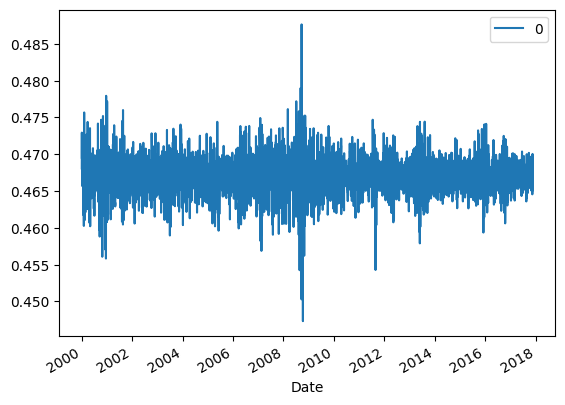

In [ ]:
h_t.plot()

In [ ]:
# Example prediction
model.eval()
with torch.no_grad():
    example_input = torch.tensor(X_scaled[-1:], dtype=torch.float32)
    predicted_output = model(example_input)
    predicted_output = scaler.inverse_transform(predicted_output)

print("Example prediction:", predicted_output)

# Informer

In [ ]:
class DecompositionLayer(nn.Module):
    """
    Returns the trend and the seasonal parts of the time series.
    """

    def __init__(self, kernel_size):
        super().__init__()
        self.kernel_size = kernel_size
        self.avg = nn.AvgPool1d(kernel_size=kernel_size, stride=1, padding=0) # moving average

    def forward(self, x):
        """Input shape: Batch x Time x EMBED_DIM"""
        # padding on the both ends of time series
        num_of_pads = (self.kernel_size - 1) // 2
        front = x[:, 0:1, :].repeat(1, num_of_pads, 1)
        end = x[:, -1:, :].repeat(1, num_of_pads, 1)
        x_padded = torch.cat([front, x, end], dim=1)

        # calculate the trend and seasonal part of the series
        x_trend = self.avg(x_padded.permute(0, 2, 1)).permute(0, 2, 1)
        x_seasonal = x - x_trend
        return x_seasonal, x_trend

